In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df=pd.read_csv('Churn_Modelling.csv')

In [36]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [37]:
# Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
print(f"{geography.head()}\n{gender.head()}")

   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1
   Male
0     0
1     0
2     0
3     0
4     0


In [38]:
X=pd.concat([X,geography,gender],axis=1)

In [39]:
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [40]:
# Splitting dataset into the training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
# Feature scaling into the same scale rate
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [42]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #Used to create NN
from keras.layers import Dense
from keras.layers import Dropout # to solve overfitting of the deep nn if of is greateer we must increase dropout ratio
from keras.layers import LeakyReLU,PReLU,ELU

In [43]:
# Initializing ANN
clf=Sequential()
len(X.columns) # No  of inputs in ANN

11

In [44]:
# It's useful to use ReLu & LeakyReLu in hidden layers & sigmoid for binary classification
# Adding the input layer and first hidden layer
clf.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=11))
clf.add(Dropout(0.3))
# Adding the 2nd hidden layer
clf.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.4))
# Adding the 3rd hidden layer
clf.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.2))
# Adding the output layer
clf.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
clf.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                120       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 15)                315       
_________________________________________________________________
dropout_7 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [45]:
# Compiling the ANN
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
# Fitting the ANN to the Training set
model_history=clf.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 281us/step - loss: 0.6294 - accuracy: 0.7339 - val_loss: 0.4878 - val_accuracy: 0.7963
Epoch 2/100
5359/5359 [==============================] - 1s 206us/step - loss: 0.5247 - accuracy: 0.7850 - val_loss: 0.4675 - val_accuracy: 0.7982
Epoch 3/100
5359/5359 [==============================] - 1s 202us/step - loss: 0.4875 - accuracy: 0.7960 - val_loss: 0.4548 - val_accuracy: 0.8001
Epoch 4/100
5359/5359 [==============================] - 1s 216us/step - loss: 0.4763 - accuracy: 0.7972 - val_loss: 0.4505 - val_accuracy: 0.7989
Epoch 5/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.4756 - accuracy: 0.7970 - val_loss: 0.4470 - val_accuracy: 0.7989
Epoch 6/100
5359/5359 [==============================] - 1s 202us/step - loss: 0.4688 - accuracy: 0.7987 - val_loss: 0.4429 - val_accuracy: 0.8016
Epoch 7/100
5359/5359 [==============================] - 1s 202us/step

5359/5359 [==============================] - 1s 216us/step - loss: 0.3701 - accuracy: 0.8419 - val_loss: 0.3647 - val_accuracy: 0.8493
Epoch 57/100
5359/5359 [==============================] - 1s 200us/step - loss: 0.3820 - accuracy: 0.8386 - val_loss: 0.3703 - val_accuracy: 0.8459
Epoch 58/100
5359/5359 [==============================] - 1s 226us/step - loss: 0.3693 - accuracy: 0.8427 - val_loss: 0.3729 - val_accuracy: 0.8364
Epoch 59/100
5359/5359 [==============================] - 1s 212us/step - loss: 0.3693 - accuracy: 0.8466 - val_loss: 0.3621 - val_accuracy: 0.8474
Epoch 60/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.3708 - accuracy: 0.8410 - val_loss: 0.3700 - val_accuracy: 0.8432
Epoch 61/100
5359/5359 [==============================] - 1s 221us/step - loss: 0.3687 - accuracy: 0.8416 - val_loss: 0.3703 - val_accuracy: 0.8425
Epoch 62/100
5359/5359 [==============================] - 1s 211us/step - loss: 0.3657 - accuracy: 0.8440 - val_loss: 0.3674 

In [49]:
# list all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


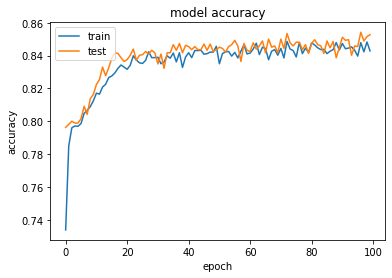

In [50]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

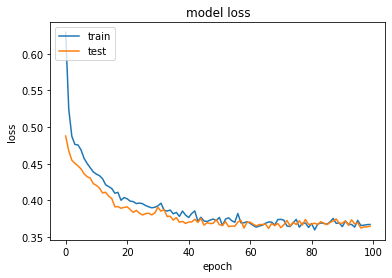

In [51]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [61]:
# Predicting the Test set results
y_pred = clf.predict(X_test)
y_pred = y_pred > 0.5

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [64]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8585

(2.0, 0.0)

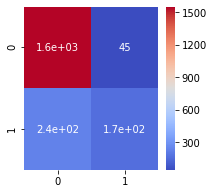

In [65]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(cm,cmap='coolwarm',annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)